In [1]:
%matplotlib inline
from dataloader import *
from plotter import *
from neural_net import *
from scripts import *

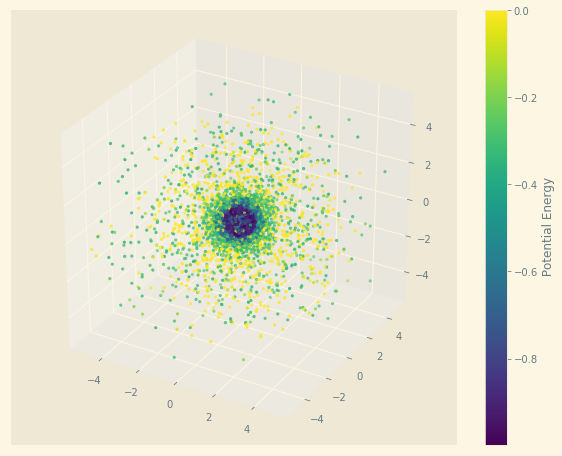

In [2]:
#load dataset
features = load_features("../data/3P_CENTERED_COORDINATES.txt")
#features = load_features("../data/features.txt")
#features = list(load_features("../data/3P_ALIGNED_COORDINATES.txt")) + list(load_features("../data/features.txt"))
labels = load_labels("../data/3P_T018_POTENTIALS.txt", 1)
#labels = load_labels("../data/labels.txt", 1)
#labels = list(labels) + list(load_labels("../data/labels.txt", 1))

x = []
y = []
z = []
c = []
for i in range(len(features)):
    for j in range(0, len(features[i]), 3):
        x.append(features[i][j+0])
        y.append(features[i][j+1])  
        z.append(features[i][j+2])
        c.append(labels[i])
plt.style.use('Solarize_Light2')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
a = ax.scatter(x, y, z, s=5, c=np.array(c).flatten())
fig.colorbar(a, label=' Potential Energy')
plt.show()

In [3]:
#define Structure of neural net
structure = [9, 11, 6, 6, 2, 1]
activations = ['tanh', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh']
model_dir = "../models/TransRot0.18_3.ckpt"

#initialize neural network and train
nn = NEURAL_NET(3, structure, activations)
nn.learning_rate = 0.5
#nn.train(features, labels, test_set_size=1000, num_steps=100000, save=True, restore=True, model_save_dir=model_dir)

INFO:tensorflow:Restoring parameters from ../models/TransRot0.18_3.ckpt
INFO:tensorflow:Restoring parameters from ../models/TransRot0.18_3.ckpt


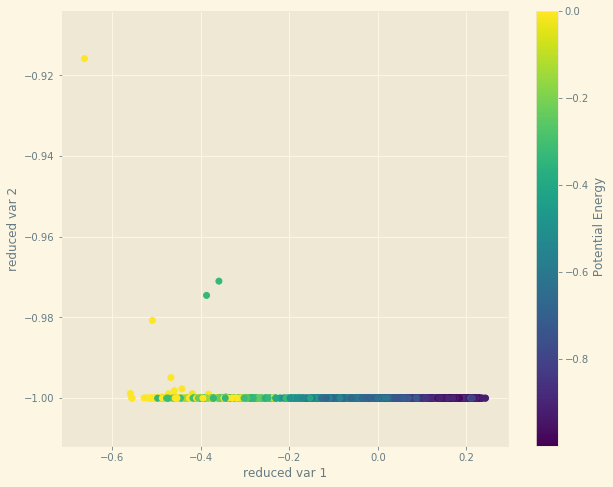

In [4]:
reduced_space = nn.get_reduced_space(features, model_dir)
predicted_potentials = nn.get_output_space(features, model_dir)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
a = ax.scatter(reduced_space[:, 0], reduced_space[:, 1], c=np.array(labels).flatten())
ax.set_xlabel('reduced var 1')
ax.set_ylabel('reduced var 2')
plt.style.use('seaborn-deep')
fig.colorbar(a, label=' Potential Energy')
plt.show()

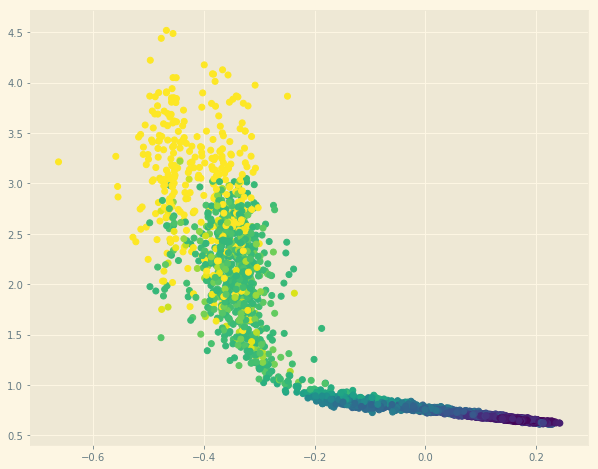

In [7]:
RoG = np.zeros(len(features))
for i in range(len(features)):
    particles = np.reshape(features[i], [3, 3])
    for j in range(len(particles)):
        RoG[i] += np.linalg.norm(particles[j])/3.0
plot_2d(reduced_space[:, 0], RoG, color=np.array(labels).flatten())
#plot_2d(n_bonds, labels)

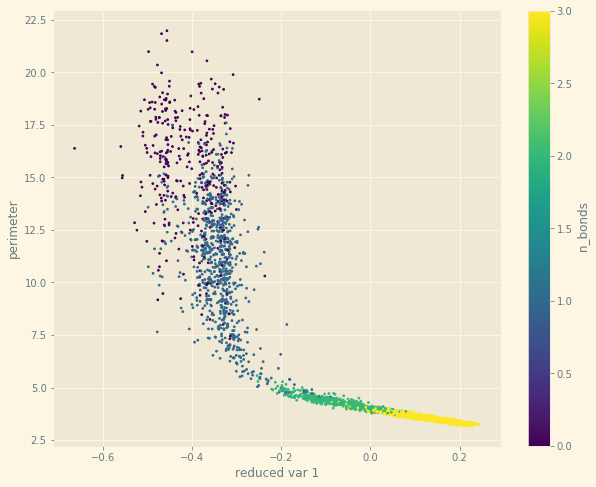

In [15]:
#extract some information from the feature space 
side_length_space = [] #side lengths between each particles
perimeter = [] #side lengths between each particles
n_bonds = np.zeros(len(features)) #number of bonds in the structure
cut_off_distance = 1.55 #sigma  
for i in range(len(features)):
    side_length_space.append([])
    particles = np.reshape(features[i], [3, 3])
    side_length_space[i] = [np.linalg.norm(particles[0]-particles[1]),
                            np.linalg.norm(particles[1]-particles[2]),
                            np.linalg.norm(particles[0]-particles[2])]   
    perimeter.append(np.sum(side_length_space[i]))
    b = 0
    if side_length_space[i][0] < cut_off_distance:
        n_bonds[i] += 1
    if side_length_space[i][1] < cut_off_distance:
        n_bonds[i] += 1
    if side_length_space[i][2] < cut_off_distance:
        n_bonds[i] += 1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
a = ax.scatter(reduced_space[:, 0], perimeter, s = 3,c=np.array(n_bonds).flatten())
ax.set_xlabel('reduced var 1')
ax.set_ylabel('perimeter')
fig.colorbar(a, label=' n_bonds')

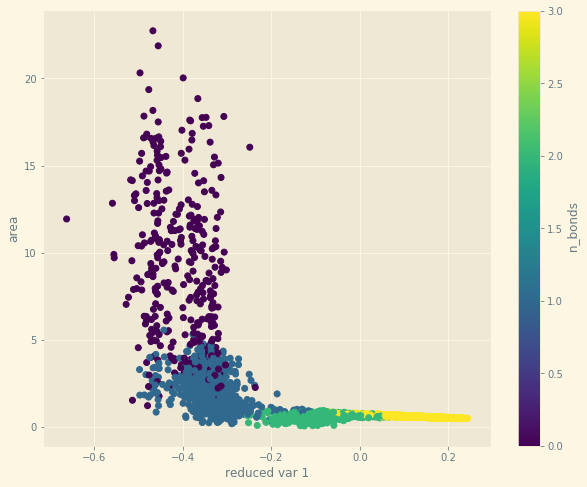

In [9]:
area = []
for i in range(len(features)):
    points = np.reshape(features[i], [3, 3])
    r1 = points[1] - points[0]
    r2 = points[2] - points[0]
    area.append(np.linalg.norm(np.cross(r1, r2))*0.5)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
a = ax.scatter(reduced_space[:, 0], area, c=np.array(n_bonds).flatten())
ax.set_xlabel('reduced var 1')
ax.set_ylabel('area')
fig.colorbar(a, label=' n_bonds')

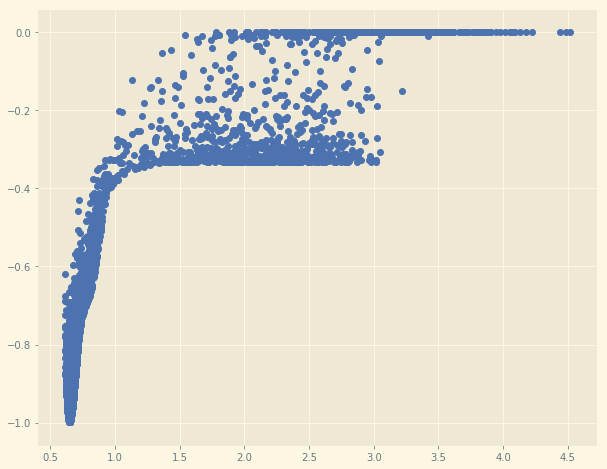

In [16]:
plot_2d(RoG, labels)

In [17]:
np.std(reduced_space[:, 1])

0.0013396342